# Quantum Fourier Transform 
https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.QFT

## Class

```python
class qiskit.circuit.library.QFT(
    num_qubits=None,
    approximation_degree=0,
    do_swaps=True,
    inverse=False,
    insert_barriers=False,
    name=None
)

### Quantum Fourier Transform (QFT)

The Quantum Fourier Transform (QFT) on $n$ qubits is the operation:

$$
\ket{j} \mapsto \frac{1}{2^{n/2}} \sum_{k=0}^{2^n - 1} e^{2\pi i jk / 2^n} \ket{k}
$$

The circuit that implements this transformation uses:
- **Hadamard gates** on each qubit,
- A series of **controlled-$U_1$** (or Z, depending on the phase) gates,
- And a final layer of **SWAP gates**.

> 🔁 The SWAP layer can be omitted if the QFT appears at the end of a circuit, as the reordering can be handled classically. This behavior is controlled via the `do_swaps` attribute.

To reduce circuit depth, the QFT can be implemented approximately by skipping controlled-phase rotations with very small angles.  
This is adjusted using the `approximation_degree` attribute — the smallest-angle rotation gates are dropped based on this setting.


#### Parameters

- `num_qubits` (`int` | `None`) – The number of qubits on which the QFT acts.
- `approximation_degree` (`int`) – The degree of approximation (`0` for no approximation).
- `do_swaps` (`bool`) – Whether to include the final swaps in the QFT.
- `inverse` (`bool`) – If `True`, the inverse Fourier transform is constructed.
- `insert_barriers` (`bool`) – If `True`, barriers are inserted as a visualization improvement.
- `name` (`str` | `None`) – The name of the circuit.


#### Attributes

- **`ancillas`**: A list of `AncillaQubit`s in the order that they were added. You should not mutate this.

- **`approximation_degree`**: The approximation degree of the QFT.  
  - **Returns:** The currently set approximation degree.

- **`clbits`**: A list of `Clbit`s in the order that they were added. You should not mutate this.

- **`cregs`**: A list of classical registers in the order that they were added. You should not mutate this.

- **`data`**: The circuit data (instructions and context).  
  - **Returns:** A list-like object containing the `CircuitInstruction`s for each instruction.  
  - **Return type:** `QuantumCircuitData`

- **`do_swaps`**: Whether the final swaps of the QFT are applied or not.  
  - **Returns:** `True` if the final swaps are applied, `False` otherwise.

- **`duration`**: The total duration of the circuit, set by a scheduling transpiler pass. Its unit is specified by `unit`.  
  *Deprecated since version 1.3.0: This property is deprecated as of Qiskit 1.3.0 and will be removed in Qiskit 3.0.0.*

- **`global_phase`**: The global phase of the current circuit scope in radians.

- **`insert_barriers`**: Whether barriers are inserted for better visualization.  
  - **Returns:** `True` if barriers are inserted, `False` otherwise.

- **`instances`**: Default value: `187`.

- **`layout`**: Return any associated layout information about the circuit. This contains an optional `TranspileLayout` object, set by `transpile()` or `PassManager.run()` to retain qubit permutation information from initial and final layout transformations.

- **`metadata`**: Arbitrary user-defined metadata for the circuit. Qiskit does not inspect this but preserves it through transpilation.

- **`num_ancillas`**: Returns the number of ancilla qubits.

- **`num_captured_stretches`**: The number of stretches marked as captured from an enclosing scope.  
  This is the length of the `iter_captured_stretches()` iterable. If this is non-zero, `num_input_vars` must be zero.

- **`num_captured_vars`**: Number of real-time classical variables captured from an enclosing scope.  
  This is the length of the `iter_captured_vars()` iterable. If this is non-zero, `num_input_vars` must be zero.

- **`num_clbits`**: Returns the number of classical bits.

- **`num_declared_stretches`**: Number of stretches declared in this circuit scope, excluding captures.  
  This is the length of the `iter_declared_stretches()` iterable.

- **`num_declared_vars`**: Number of real-time classical variables declared in the circuit scope (excluding inputs/captures).  
  This is the length of the `iter_declared_vars()` iterable.

- **`num_identifiers`**: The number of real-time classical variables and stretches.  
  Equal to `num_vars() + num_stretches()`.

- **`num_input_vars`**: Number of classical variables marked as circuit inputs.  
  This is the length of the `iter_input_vars()` iterable. If this is non-zero, `num_captured_vars` must be zero.

- **`num_parameters`**: The number of parameter objects in the circuit.

- **`num_qubits`**: The number of qubits in the circuit.  
  - **Returns:** The number of qubits in the circuit.

- **`num_stretches`**: Number of stretches in the circuit.  
  This is the length of the `iter_stretches()` iterable.

- **`num_vars`**: The number of real-time classical variables in the circuit.  
  This is the length of the `iter_vars()` iterable.

- **`op_start_times`**: Returns a list of estimated operation start times (available after scheduling).  
  This attribute computes the estimated starting time of the operations in the scheduled circuit and only works for simple circuits that have no control flow or other classical feed-forward operations.  
  *Note:* Works only for simple circuits without control flow or classical feed-forward.  
  - **Returns:** List of integers representing instruction estimated start times. The index corresponds to the index of instruction in `QuantumCircuit.data`  
  - **Raises:** `AttributeError` if the circuit is not scheduled.

- **`parameters`**:  
  The parameters defined in the circuit.  
  
  This attribute returns the `Parameter` objects in the circuit sorted alphabetically. Note that parameters instantiated with a `ParameterVector` are still sorted numerically.

  **Examples**

In [36]:
from qiskit.circuit import QuantumCircuit, Parameter
a, b, elephant = Parameter("a"), Parameter("b"), Parameter("elephant")
circuit = QuantumCircuit(1)
circuit.rx(b, 0)
circuit.rz(elephant, 0)
circuit.ry(a, 0)
circuit.parameters  # sorted alphabetically!

ParameterView([Parameter(a), Parameter(b), Parameter(elephant)])

Bear in mind that alphabetical sorting might be unintuitive when it comex to numbers. The literal `10` comes before `2` in alphabetical order.  

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit.library import QFT

In [37]:
from qiskit.circuit import QuantumCircuit, Parameter
angles = [Parameter("angle_1"), Parameter("angle_2"), Parameter("angle_10")]
circuit = QuantumCircuit(1)
circuit.u(*angles, 0)
circuit.draw()


┌─────────────────────────────┐
q: ┤ U(angle_1,angle_2,angle_10) ├
   └─────────────────────────────┘

In [40]:
circuit.parameters

ParameterView([Parameter(angle_1), Parameter(angle_10), Parameter(angle_2)])

To resepct numerical sorting, a `ParameterVector` is used.

In [42]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
x = ParameterVector("x", 12)
circuit = QuantumCircuit(1)
for x_i in x:
    circuit.rx(x_i, 0)
circuit.parameters

ParameterView([ParameterVectorElement(x[0]), ParameterVectorElement(x[1]), ParameterVectorElement(x[2]), ParameterVectorElement(x[3]), ParameterVectorElement(x[4]), ParameterVectorElement(x[5]), ParameterVectorElement(x[6]), ParameterVectorElement(x[7]), ParameterVectorElement(x[8]), ParameterVectorElement(x[9]), ParameterVectorElement(x[10]), ParameterVectorElement(x[11])])

Returns: The sorted `Parameter` objects in the circuit.  

- **`prefix`**:  
  Default value: `"circuit"`.

- **`qregs`**:  
  A list of quantum registers associated with the circuit.

- **`qubits`**:  
  A list of `Qubit`s in the order they were added. Should not be mutated.

- **`unit`**:  
  The unit that `duration` is specified in.  
  *Deprecated since version 1.3.0:* This property will be removed in Qiskit 3.0.0.

- **`name`**:  
  A human-readable name for the circuit.

In [27]:
qft_circ= QFT(4, approximation_degree=0,insert_barriers=True,name='qft', inverse=True)

### Methods

- **`inverse`**  
  **Description:** `inverse(annotated=False)` Inverts the circuit.  
  **Parameters:**
  - `annotated` (`bool`): Indicates whether the inverse gate can be implemented as an annotated gate. The value of this argument is ignored, as the inverse of a QFT is an IQFT, which is just another instance of QFT.  
  **Returns:** The inverted circuit.  
  **Return type:** `QFT`

- **`is_inverse`**  
  **Description:** `is_inverse()` Checks whether the inverse Fourier transform is implemented.  
  **Returns:** `True` if the inverse Fourier transform is implemented, `False` otherwise.  
  **Return type:** `bool`


### Quantum Fourier Transform (QFT) Circuit

For $n=4$ qubit the QFT circuit can be constructed as follows:

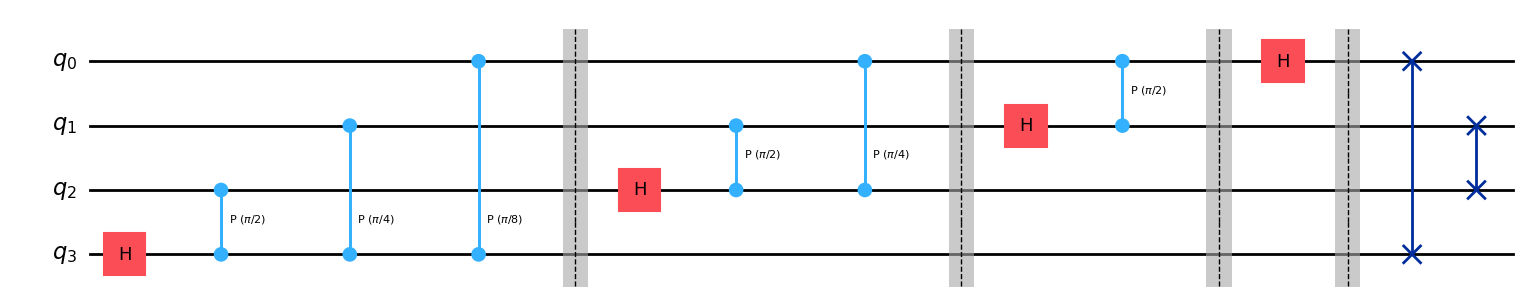

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

# Create QFT circuit for 4 qubits
num_qubits = 4
qft_circuit = QFT(num_qubits=num_qubits, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name="QFT_4")

# Draw the circuit
qft_circuit.decompose().draw('mpl')  # Use 'text' if you're in a terminal, 'mpl' if you're in a Jupyter notebook


NOTE: Here, we have kept barriers=True for better visualization.  

NOTE: that in case of Qiskit because the notation is Little Endian, the qubits are reversed. So, the qubit 0 is the last one in the list and thus we implement the QFT as show in the figure

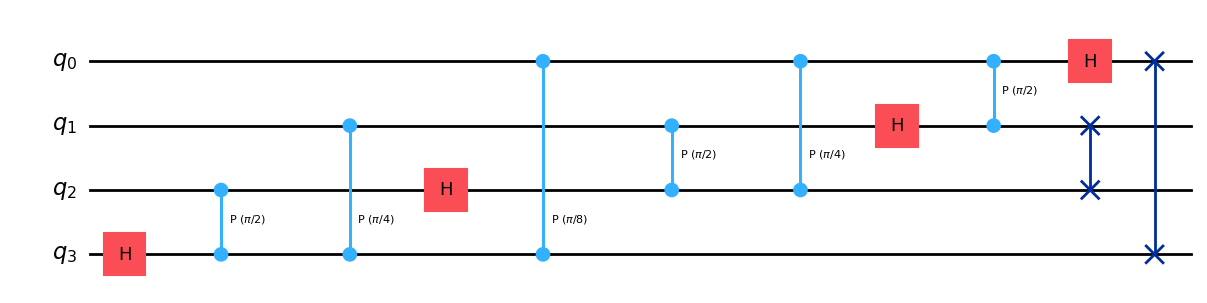

In [24]:
from qiskit import QuantumCircuit
import numpy as np

def QFT_custom(n):
    qc_QFT_custom = QuantumCircuit(n, name='QFT')
    for i in range(n-1,-1,-1):
        qc_QFT_custom.h(i)
        for j in range(i-1,-1,-1):
            qc_QFT_custom.cp(np.pi/2**(i-j),j,i)

    for i in range(n//2):
        qc_QFT_custom.swap(i,n-i-1)

    return qc_QFT_custom

n=4
qc_QFT_custom = QFT_custom(n)
qc_QFT_custom.draw('mpl', filename='../Images/QFT_4_custom.png')

### Inverse Quantum Fourier Transform (IQFT) Circuit

The inverse QFT can be obtained by calling the inverse method on this class. The respective circuit diagram is:

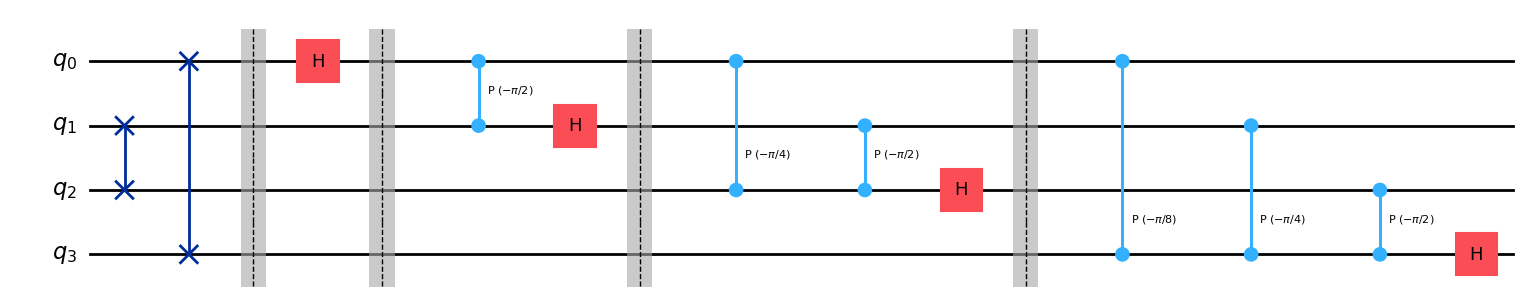

In [4]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT

# Create QFT circuit for 4 qubits
num_qubits = 4
qft_circuit = QFT(num_qubits=num_qubits, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=True, name="QFT_inv_4")

# Draw the circuit
qft_circuit.inverse().decompose().draw('mpl')  # Use 'text' if you're in a terminal, 'mpl' if you're in a Jupyter notebook

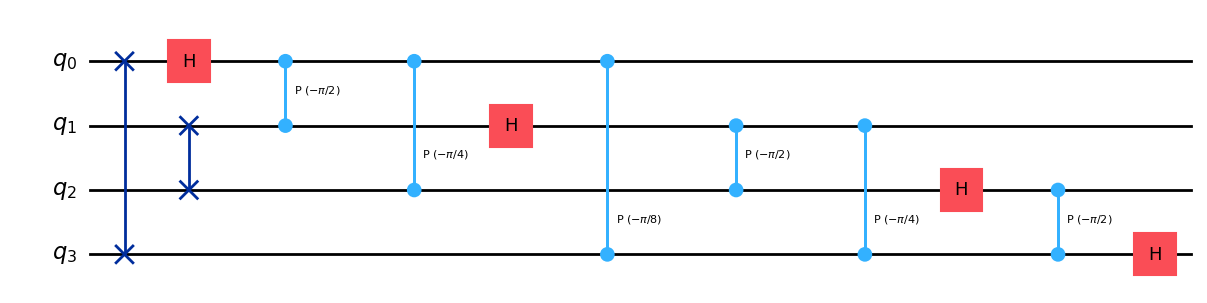

In [23]:
def IQFT_custom(n):
    qc_IQFT_custom = QuantumCircuit(n, name='IQFT')
    for i in range(n//2):
        qc_IQFT_custom.swap(i,n-i-1)

    for i in range(n):
        qc_IQFT_custom.h(i)
        for j in range(i+1,n):
            qc_IQFT_custom.cp(-np.pi/2**(j-i),j,i)



    return qc_IQFT_custom

qc_IQFT_custom = IQFT_custom(4)
qc_IQFT_custom.draw('mpl', filename='../IQFT_inv_4_custom.png')

In [30]:
from qiskit import quantum_info as qi
QFT_matrix = qi.Operator(QFT(3))
print(QFT_matrix.data)

[[ 3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j
   3.53553391e-01+0.j          3.53553391e-01+0.j        ]
 [ 3.53553391e-01+0.j          2.50000000e-01+0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01+0.25j
  -3.53553391e-01+0.j         -2.50000000e-01-0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j
   3.53553391e-01+0.j          2.16489014e-17+0.35355339j
  -3.53553391e-01+0.j         -2.16489014e-17-0.35355339j]
 [ 3.53553391e-01+0.j         -2.50000000e-01+0.25j
  -2.16489014e-17-0.35355339j  2.50000000e-01+0.25j
  -3.53553391e-01+0.j          2.50000000e-01-0.25j
   2.16489014e-17+0.35355339j -2.50000000e-01-0.25j      ]
 [ 3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j         -3.53553391e-01+0.j
   3.53553391e-01+0.j       

### Approximate Quantum Fourier Transform (AQFT) Circuit
Recall that one method to reduce circuit depth is to implement the QFT approximately by ignoring controlled-phase rotations where the angle is beneath a threshold. Here, this can be adjusted using the approximation\_degree attribute: the smallest approximation\_degree rotation angles are dropped from the QFT. For instance, a QFT on 5 qubits with approximation degree 2 yields (the barriers are dropped in this example):

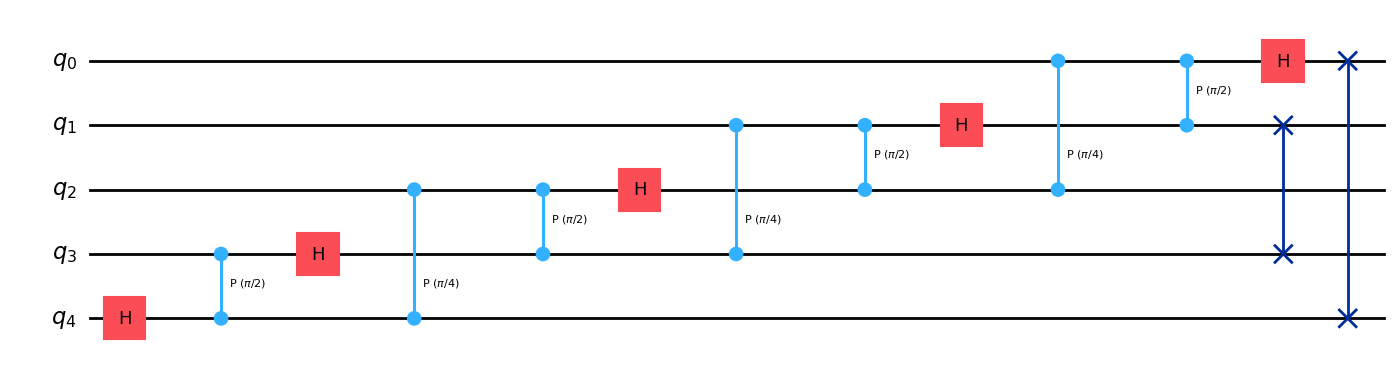

In [ ]:
qft_circuit = QFT(num_qubits=5, approximation_degree=2, do_swaps=True, inverse=False, insert_barriers=False, name="AQFT_5")

# Draw the circuit
qft_circuit.decompose().draw('mpl')  # Use 'text' if you're in a terminal, 'mpl' if you're in a Jupyter notebook